In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [5]:
import os
path = 'C:/Users/jzhou417/Desktop/pbmc3k/'
if os.path.exists(path):
    files = os.listdir(path)
files

['.ipynb_checkpoints',
 '.Rhistory',
 '1',
 '30',
 '50',
 '60',
 '70',
 '90',
 '90new',
 'barcodes.tsv',
 'Comparison-sc10x-3c.ipynb',
 'cooc',
 'cooc.csv',
 'cooc1',
 'cooc_standard',
 'filtered_feature_bc_matrix',
 'genes.tsv',
 'matrix.mtx',
 'pbmc_orign.ipynb',
 'R.txt',
 'RaceID3.csv',
 'RaceID3new.csv',
 'sc10x-3c-sce.rds',
 'sc10x-3c.rds',
 'sc3_results.xls',
 'sc3_results1.xls',
 'server',
 'seurat-R-stan.csv',
 'seurat-R.csv',
 'seurat-R1.csv',
 'seurat-R8.csv',
 'seurat-Rrs1.csv',
 'web_summary.html']

In [6]:
table = pd.read_csv(os.path.join(path, 'seurat-R-stan.csv'))
table.head(10)

,barcode,seurat_clusters
0,AAACATACAACCAC,3
1,AAACATTGAGCTAC,4
2,AAACATTGATCAGC,1
3,AAACCGTGCTTCCG,5
4,AAACCGTGTATGCG,6
5,AAACGCACTGGTAC,1
6,AAACGCTGACCAGT,3
7,AAACGCTGGTTCTT,3
8,AAACGCTGTAGCCA,3
9,AAACGCTGTTTCTG,5


In [7]:
R_10x = pd.read_csv('seurat-Rrs2.csv')
R_10x["barcode"] = R_10x['Unnamed: 0']
R_10x.pop('Unnamed: 0')
newdata = table.merge(R_10x, on='barcode')
newdata['target'] = newdata['seurat_clusters_x'].factorize()[0]

In [8]:
sc3 = pd.read_excel('sc3_results.xls')
sc3_r = table.merge(sc3, on="barcode")
sc3_r['target'] = sc3_r['seurat_clusters'].factorize()[0]

In [9]:
sc3_r.head(10)

,barcode,seurat_clusters,sc3_10_clusters,sc3_10_log2_outlier_score,target
0,AAACATACAACCAC,3,3,0.000000,0
1,AAACATTGAGCTAC,4,4,0.812803,1
2,AAACATTGATCAGC,1,2,0.000000,2
3,AAACCGTGCTTCCG,5,6,0.000000,3
4,AAACCGTGTATGCG,6,9,0.000000,4
5,AAACGCACTGGTAC,1,2,0.000000,2
6,AAACGCTGACCAGT,3,3,0.000000,0
7,AAACGCTGGTTCTT,3,8,0.000000,0
8,AAACGCTGTAGCCA,3,8,0.000000,0
9,AAACGCTGTTTCTG,5,10,0.000000,3


In [10]:
cooc = pd.read_csv('cooc.csv').T.reset_index()[1:]
cooc["barcode"] = cooc["index"]
cooc["cooc_clusters"] = cooc.loc[:,0]
cooc.pop("index")
cooc.pop(0)
cooc_data = table.merge(cooc, on="barcode")
cooc_data['target'] = cooc_data['seurat_clusters'].factorize()[0]

In [11]:
cooc_data.head(10)

,barcode,seurat_clusters,cooc_clusters,target
0,AAACATACAACCAC,3,6,0
1,AAACATTGAGCTAC,4,4,1
2,AAACATTGATCAGC,1,6,2
3,AAACCGTGCTTCCG,5,2,3
4,AAACCGTGTATGCG,6,2,4
5,AAACGCACTGGTAC,1,6,2
6,AAACGCTGACCAGT,3,6,0
7,AAACGCTGGTTCTT,3,6,0
8,AAACGCTGTAGCCA,3,6,0
9,AAACGCTGTTTCTG,5,2,3


In [12]:
race = pd.read_csv('RaceID3.csv')
race["barcode"] = race["Unnamed: 0"]
race.pop("Unnamed: 0")
race_data = table.merge(race, on="barcode")
race_data['target'] = race_data['seurat_clusters'].factorize()[0]

In [13]:
race_data.head(10)

,barcode,seurat_clusters,V1,target
0,AAACATACAACCAC,3,1,0
1,AAACATTGAGCTAC,4,2,1
2,AAACATTGATCAGC,1,3,2
3,AAACCGTGCTTCCG,5,9,3
4,AAACCGTGTATGCG,6,19,4
5,AAACGCACTGGTAC,1,6,2
6,AAACGCTGACCAGT,3,3,0
7,AAACGCTGGTTCTT,3,24,0
8,AAACGCTGTAGCCA,3,6,0
9,AAACGCTGTTTCTG,5,4,3


# Cluster Count

In [14]:
def cluster_counts(df, cluster_name, name):
    print("Cluster counts for {}".format(name))
    groups = df.groupby(by = cluster_name)
    return groups["target"].describe()[['count']]

In [15]:
cluster_counts(sc3_r, 'sc3_10_clusters', '3. sc3 10x')

Cluster counts for 3. sc3 10x


,count
sc3_10_clusters,
1,485.0
2,571.0
3,169.0
4,334.0
5,281.0
6,217.0
7,9.0
8,217.0
9,156.0


In [16]:
cluster_counts(cooc_data, 'seurat_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
seurat_clusters,
0,589.0
1,512.0
2,456.0
3,349.0
4,340.0
5,168.0
6,144.0
7,36.0
8,6.0


In [17]:
cluster_counts(cooc_data, 'cooc_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
cooc_clusters,
1,242.0
2,402.0
3,28.0
4,338.0
5,269.0
6,1321.0


# Compare with Seurat

In [18]:
def reorder(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns)+1)}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

def reorder_seurat(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns))}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

In [19]:
df_r = pd.crosstab(newdata['target'], newdata['seurat_clusters_y'])
df_r_s = df_r.copy()
df_r_s["sum"] = df_r.sum(axis=1)
df_r_s

seurat_clusters_y,0,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,,
0,16,1,3,246,35,42,0,0,0,5,0,0,1,349
1,3,337,0,0,0,0,0,0,0,0,0,0,0,340
2,338,0,57,12,101,0,0,0,0,0,0,2,2,512
3,0,0,0,0,0,0,1,159,8,0,0,0,0,168
4,0,0,0,11,0,0,0,0,0,130,0,0,3,144
5,12,0,245,1,127,204,0,0,0,0,0,0,0,589
6,0,0,0,0,0,0,217,6,147,0,84,2,0,456
7,0,0,0,0,0,0,1,0,2,0,0,33,0,36
8,0,0,0,0,0,0,0,5,1,0,0,0,0,6


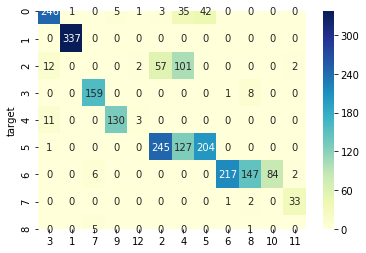

In [20]:
df_r = reorder_seurat(df_r)
sns.heatmap(df_r, cmap="YlGnBu", annot=True, fmt="d")

In [21]:
df_sc3 = pd.crosstab(sc3_r['target'], sc3_r['sc3_10_clusters'])
df_sc3_s = df_sc3.copy()
df_sc3_s["sum"] = df_sc3_s.sum(axis=1)
df_sc3_s

sc3_10_clusters,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,
0,5,102,18,0,0,0,0,210,14,0,349
1,0,1,0,334,0,0,4,1,0,0,340
2,63,371,74,0,0,0,4,0,0,0,512
3,0,0,0,0,2,9,0,0,0,157,168
4,0,0,0,0,0,0,0,3,141,0,144
5,417,96,73,0,0,0,0,3,0,0,589
6,0,0,0,0,276,177,0,0,0,3,456
7,0,1,0,0,2,31,1,0,1,0,36
8,0,0,4,0,1,0,0,0,0,1,6


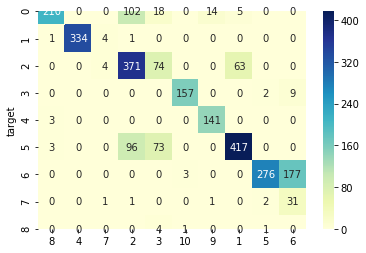

In [22]:
df_sc3 = reorder(df_sc3)
sns.heatmap(df_sc3, cmap="YlGnBu", annot=True, fmt="d")

In [23]:
df_cooc = pd.crosstab(cooc_data['target'], cooc_data[cooc_data['cooc_clusters']<20]['cooc_clusters'])
df_cooc_s = df_cooc.copy()
df_cooc_s["sum"] = df_cooc.sum(axis=1)
df_cooc_s

cooc_clusters,1,2,3,4,5,6,sum
target,,,,,,,
0,0,1,0,1,122,225,349
1,0,2,0,336,0,2,340
2,0,1,1,0,4,506,512
3,147,20,1,0,0,0,168
4,0,1,0,0,143,0,144
5,0,2,0,0,0,587,589
6,93,362,1,0,0,0,456
7,1,8,25,1,0,1,36
8,1,5,0,0,0,0,6


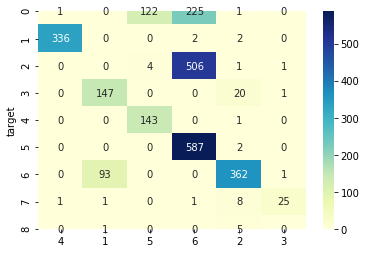

In [24]:
df_cooc = reorder(df_cooc)
sns.heatmap(df_cooc, cmap="YlGnBu", annot=True, fmt="d")

In [25]:
df_race = pd.crosstab(race_data['target'], race_data[race_data['V1']<13]['V1'])
df_race_s = df_race.copy()
df_race_s["sum"] = df_race.sum(axis=1)
df_race_s

V1,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,
0,41,1,75,0,142,59,0,20,0,0,0,0,338
1,30,208,30,0,7,12,0,32,0,0,0,0,319
2,195,1,133,0,64,21,0,88,0,0,0,0,502
3,1,0,0,148,6,0,0,0,13,0,0,0,168
4,5,0,2,0,91,18,0,1,0,0,0,0,117
5,73,3,296,0,6,42,0,163,0,0,0,0,583
6,0,0,0,90,0,0,290,1,28,3,35,0,447
7,2,1,0,0,1,0,2,0,1,28,1,0,36
8,0,0,0,1,0,0,1,0,0,0,0,3,5


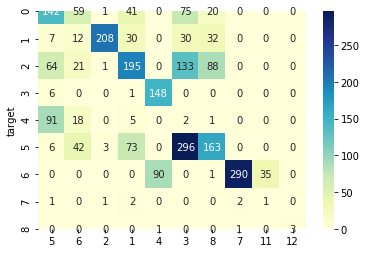

In [26]:
df_race = reorder(df_race)
df_race = df_race.drop(columns = [9,10])
sns.heatmap(df_race, cmap="YlGnBu", annot=True, fmt="d")

# Calculating the metrics

In [27]:
def calc_h_accuracy(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=0)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df.columns)

def calc_h_purity(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=1)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df)

In [28]:
print("======pbmc3k results======")
print("The entropy of cluster accuracy for seurat R: {:.5f}".format(calc_h_accuracy(df_r)))
print("The entropy of cluster accuracy for sc3: {:.5f}".format(calc_h_accuracy(df_sc3)))
print("The entropy of cluster accuracy for cooc: {:.5f}".format(calc_h_accuracy(df_cooc)))
print("The entropy of cluster accuracy for RaceID3: {:.5f}".format(calc_h_accuracy(df_race)))

======pbmc3k results======
The entropy of cluster accuracy for seurat R: 0.55376
The entropy of cluster accuracy for sc3: 0.67729
The entropy of cluster accuracy for cooc: 0.83845
The entropy of cluster accuracy for RaceID3: 1.05029


In [29]:
print("======pbmc3k results======")
print("The entropy of cluster purity for seurat R: {:.5f}".format(calc_h_purity(df_r)))
print("The entropy of cluster purity for sc3: {:.5f}".format(calc_h_purity(df_sc3)))
print("The entropy of cluster purity for cooc: {:.5f}".format(calc_h_purity(df_cooc)))
print("The entropy of cluster purity for RaceID3: {:.5f}".format(calc_h_purity(df_race)))

======pbmc3k results======
The entropy of cluster purity for seurat R: 0.86575
The entropy of cluster purity for sc3: 0.84591
The entropy of cluster purity for cooc: 0.50489
The entropy of cluster purity for RaceID3: 1.52182


In [31]:
from sklearn.metrics.cluster import adjusted_rand_score
print("======pbmc3k cell lines results======")
print("The ARI for seurat R (resolution=1): {:.5f}".format(adjusted_rand_score(newdata['target'], newdata['seurat_clusters_y'])))
print("The ARI for sc3: {:.5f}".format(adjusted_rand_score(sc3_r['target'], sc3_r['sc3_10_clusters'])))
print("The ARI for cooc: {:.5f}".format(adjusted_rand_score(cooc_data['target'], cooc_data['cooc_clusters'])))
print("The ARI for RaceID3: {:.5f}".format(adjusted_rand_score(race_data['target'], race_data['V1'])))

======pbmc3k cell lines results======
The ARI for seurat R (resolution=1): 0.55342
The ARI for sc3: 0.58285
The ARI for cooc: 0.47723
The ARI for RaceID3: 0.31211
